# Compare hourly averages N02

In [1]:
%%capture
import sys
sys.path.insert(1, '../../../utilities')
#sys.path.insert(1, '../../')
import windspectra, load_alldata
import numpy as np
import matplotlib.pyplot as plt

# For colors
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from scipy import interpolate

#from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# Nalu-wind runs, hourly averaged

In [2]:
# Provide locations and parameters of data
l_cases = {
    #'amrwind-ksgs-lim':   load_data.AMRWindStats('AmrWind'),
    'naluwind-24':        load_alldata.NaluWindStats('24'),
    'naluwind-25':        load_alldata.NaluWindStats('25'),
    'naluwind-26':        load_alldata.NaluWindStats('26'),
    'naluwind-27':        load_alldata.NaluWindStats('27'),
    'naluwind-28':        load_alldata.NaluWindStats('28'),
    'naluwind-29':        load_alldata.NaluWindStats('29'),
    'naluwind-30':        load_alldata.NaluWindStats('30'),
    'naluwind-31':        load_alldata.NaluWindStats('31'),
    'Pedersen:2014':      load_alldata.PedersonData('../../pedersen2014_data',
                                                    ufile='umag_pederesen2014.txt',
                                                    tfile='temperature_pedersen2014.txt'),
}

In [3]:
normalize = mcolors.Normalize(vmin=24.0, vmax=31.0)
# Choose a colormap
#colormap = cm.viridis
colormap = cm.jet 

ccolor = lambda x: colormap(normalize(x))

# What kind of line styles to use in the plots
styles = {
    #'amrwind-ksgs-lim':     {'color':'r',         'lw':2, 'ls':'-',  'plotspectra':True},
    'naluwind-24':          {'color':ccolor(24.0), 'lw':1, 'ls':'-',  'plotspectra':False},
    'naluwind-25':          {'color':ccolor(25.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-26':          {'color':ccolor(26.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-27':          {'color':ccolor(27.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-28':          {'color':ccolor(28.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-29':          {'color':ccolor(29.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-30':          {'color':ccolor(30.0), 'lw':1,   'ls':'-',  'plotspectra':False},
    'naluwind-31':          {'color':ccolor(31.0), 'lw':2,   'ls':'-',  'plotspectra':False},
    'Pedersen:2014':        {'color':'k',         'lw':3, 'ls':'-',  'plotspectra':False},
}


## Plot velocity profiles

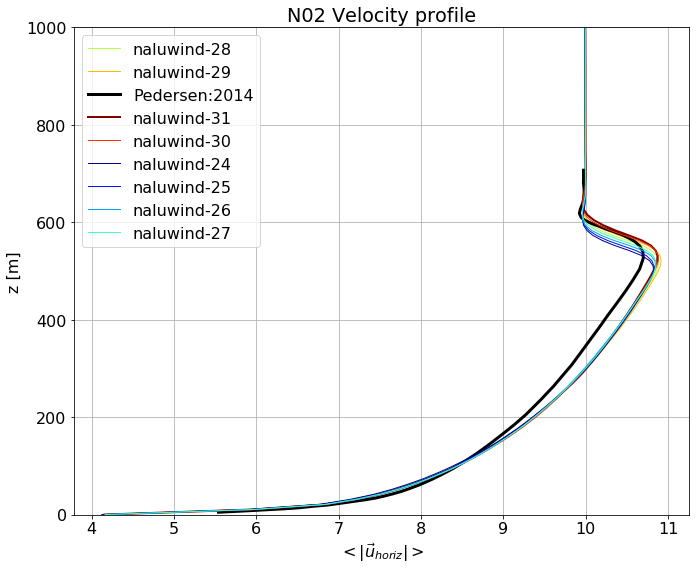

In [4]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in l_cases.items():
    ls=styles[l]
    plt.plot(c.hvelmag, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

plt.xlabel(r'$< | \vec{u}_{horiz} | >$')
plt.ylabel('z [m]')
plt.legend(loc=0)
plt.ylim(0,1000)
#plt.ylim(0,100)
plt.grid()
plt.tight_layout()
plt.title('N02 Velocity profile')

## Plot temperature profile

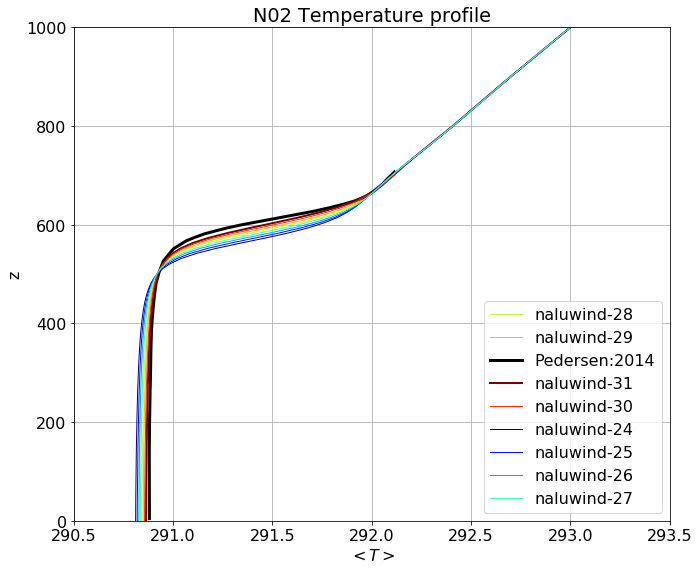

In [5]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in l_cases.items():
    ls=styles[l]
    plt.plot(c.T, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
plt.xlabel(r'$<T>$')
plt.ylabel('z')
plt.legend(loc=0)
plt.ylim(0,1000)
plt.xlim(290.5, 293.5)
plt.grid()
plt.tight_layout()
plt.title('N02 Temperature profile')

## Compute L2 difference

In [6]:
maxz = 675 # Don't consider anything above this height

print("%15s %10s %10s"%("Case", "DeltaU_L2", "DeltaT_L2"))
print("%15s %10s %10s"%("====", "=========", "========="))
    
for l,c in l_cases.items():
    #print('case = %s'%l)
    Uinterp = interpolate.interp1d(c.z, c.hvelmag)
    Tinterp = interpolate.interp1d(c.z, c.T)
    # compare with Pedersen
    refc=l_cases['Pedersen:2014']
    Udiff = []
    Tdiff = []
    for zi, z in enumerate(refc.z):
        if z < maxz:
            deltaz = refc.z[zi+1]-z
            Udiff.append((refc.hvelmag[zi]-Uinterp(z))*deltaz)
            Tdiff.append((refc.T[zi]-Tinterp(z))*deltaz)
    L2U = np.linalg.norm(np.array(Udiff))
    L2T = np.linalg.norm(np.array(Tdiff))
    print("%15s %10f %10f"%(l, L2U, L2T))
        

           Case  DeltaU_L2  DeltaT_L2
           ====  =========  =========
    naluwind-28  20.267024   5.358368
    naluwind-29  21.163788   4.394332
  Pedersen:2014   0.000000   0.000000
    naluwind-31  18.968138   2.274117
    naluwind-30  19.545251   3.327264
    naluwind-24  20.178371   9.725123
    naluwind-25  19.648486   8.608876
    naluwind-26  18.557810   7.503303
    naluwind-27  19.042526   6.404824


# AMR-Wind runs, 24/32 hours, with/without limiter

## Comparison for AMR-Wind N02 runs

In [7]:
# Provide locations and parameters of data
a_cases = {
    #'amrwind-ksgs-lim':   load_data.AMRWindStats('AmrWind'),
    #'SOWFA-32hr':              load_data.NaluWindStats('SOWFA'),
    #'amrwind-ksgs-nolim': load_data.AMRWind2Stats('AmrWind_KSGS_NoLim'),
    'amrwind-ksgs-lim-32hr':   load_alldata.AMRWindStats('../../AmrWind'),
    'amrwind-ksgs-nolim-32hr': load_alldata.AMRWind2Stats('../../AmrWind_KSGS_NoLim'),
    'amrwind-smag-lim-32hr':   load_alldata.AMRWind2Stats('../../AmrWind_Smag_Lim'),
    'amrwind-smag-nolim-32hr': load_alldata.AMRWind2Stats('../../AmrWind_Smag_NoLim'),
    'amrwind-smag-lim-24hr':   load_alldata.AMRWind2Stats('../../AmrWind_Smag_Lim_24hr'),
    'amrwind-smag-nolim-24hr': load_alldata.AMRWind2Stats('../../AmrWind_Smag_NoLim_24hr'),
    'amrwind-ksgs-nolim-24hr': load_alldata.AMRWind2Stats('../../AmrWind_KSGS_NoLim_24hr'),
    'Pedersen:2014':      load_alldata.PedersonData('../../pedersen2014_data',
                                                    ufile='umag_pederesen2014.txt',
                                                    tfile='temperature_pedersen2014.txt'),
}

# What kind of line styles to use in the plots


a_styles = {
#   'amrwind-ksgs-lim':     {'color':'r',         'lw':2, 'ls':'-',  'plotspectra':True},
#    'naluwind-smag': {'color':'c', 'lw':1, 'ls':'-', 'plotspectra':True},
    'Pedersen:2014':        {'color':'k',         'lw':3, 'ls':'-',  'plotspectra':False},
#    'amrwind-ksgs-nolim':   {'color':'r',         'lw':2, 'ls':'--', 'plotspectra':True},
    'amrwind-smag-lim-32hr':     {'color':'orange',    'lw':1, 'ls':'-',  'plotspectra':True},
    'amrwind-smag-nolim-32hr':   {'color':'orange',    'lw':1, 'ls':'--', 'plotspectra':True},
    'amrwind-smag-lim-24hr':     {'color':'gray',    'lw':2, 'ls':'-',  'plotspectra':True},
    'amrwind-smag-nolim-24hr':   {'color':'gray',    'lw':2, 'ls':'--', 'plotspectra':True},
    
    'amrwind-ksgs-nolim-24hr':   {'color':'r',       'lw':2, 'ls':'--', 'plotspectra':True},
    'amrwind-ksgs-nolim-32hr':   {'color':'pink',    'lw':1, 'ls':'--', 'plotspectra':True},
    'amrwind-ksgs-lim-32hr':     {'color':'pink',    'lw':3, 'ls':'-', 'plotspectra':True},
}

## Plot velocity profiles

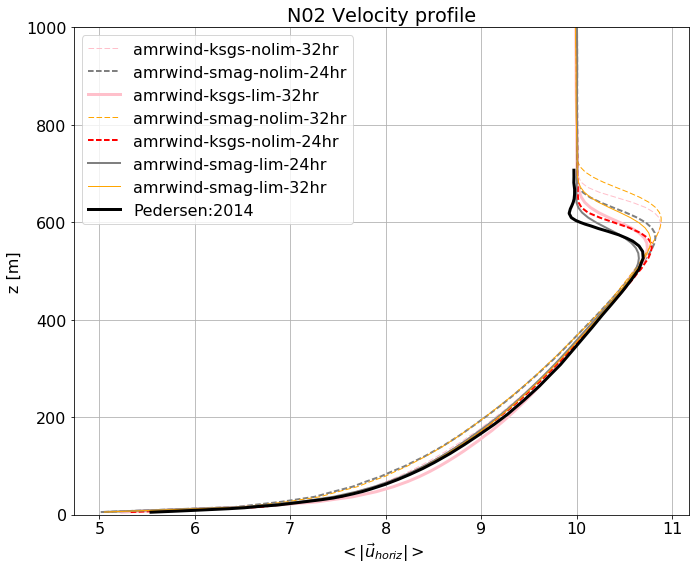

In [8]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in a_cases.items():
    ls=a_styles[l]
    plt.plot(c.hvelmag, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

plt.xlabel(r'$< | \vec{u}_{horiz} | >$')
plt.ylabel('z [m]')
plt.legend(loc=0)
plt.ylim(0,1000)
#plt.ylim(0,100)
plt.grid()
plt.tight_layout()
plt.title('N02 Velocity profile')

## Plot temperature profile

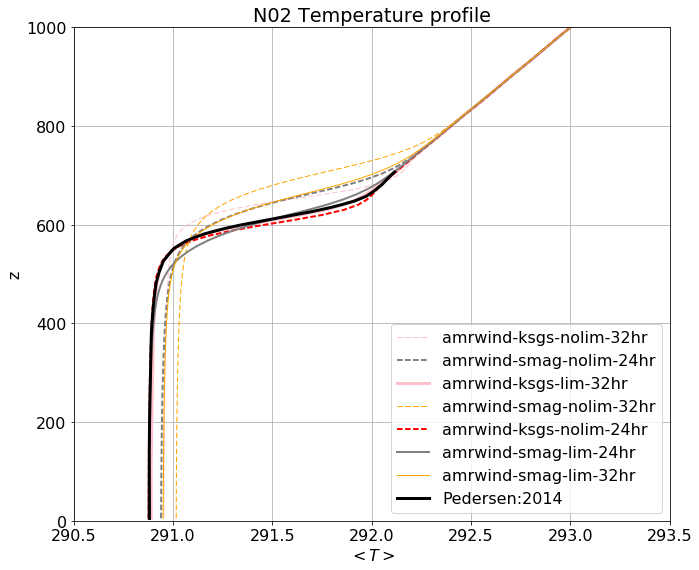

In [9]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in a_cases.items():
    ls=a_styles[l]
    plt.plot(c.T, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
plt.xlabel(r'$<T>$')
plt.ylabel('z')
plt.legend(loc=0)
plt.ylim(0,1000)
plt.xlim(290.5, 293.5)
plt.grid()
plt.tight_layout()
plt.title('N02 Temperature profile')

##  Compute L2 difference

In [10]:
maxz = 675 # Don't consider anything above this height

print("%25s %10s %10s"%("Case", "DeltaU_L2", "DeltaT_L2"))
print("%25s %10s %10s"%("====", "=========", "========="))
    
for l,c in a_cases.items():
    #print('case = %s'%l)
    Uinterp = interpolate.interp1d(c.z, c.hvelmag)
    Tinterp = interpolate.interp1d(c.z, c.T)
    # compare with Pedersen
    refc=a_cases['Pedersen:2014']
    Udiff = []
    Tdiff = []
    for zi, z in enumerate(refc.z):
        if (z < maxz) and (z>min(refc.z)):
            #print('z = %f',z)
            deltaz = refc.z[zi+1]-z
            Udiff.append((refc.hvelmag[zi]-Uinterp(z))*deltaz)
            Tdiff.append((refc.T[zi]-Tinterp(z))*deltaz)
    L2U = np.linalg.norm(np.array(Udiff))
    L2T = np.linalg.norm(np.array(Tdiff))
    print("%25s %10f %10f"%(l, L2U, L2T))
        

                     Case  DeltaU_L2  DeltaT_L2
                     ====  =========  =========
  amrwind-ksgs-nolim-32hr  19.523356  11.840651
  amrwind-smag-nolim-24hr  20.524135  10.736878
    amrwind-ksgs-lim-32hr   9.430113   1.160812
  amrwind-smag-nolim-32hr  26.617858  20.372874
  amrwind-ksgs-nolim-24hr   7.186169   2.513049
    amrwind-smag-lim-24hr   6.407910   2.921968
    amrwind-smag-lim-32hr  12.273515  11.528652
            Pedersen:2014   0.000000   0.000000


# Comparison of the "best" runs

In [11]:
# Provide locations and parameters of data
b_cases = {
    'amrwind-ksgs-lim-32hr':   load_alldata.AMRWindStats('../../AmrWind'),
    'amrwind-smag-lim-24hr':   load_alldata.AMRWind2Stats('../../AmrWind_Smag_Lim_24hr'),
    
    'naluwind-31':        load_alldata.NaluWindStats('31'),

    'Pedersen:2014':      load_alldata.PedersonData('../../pedersen2014_data',
                                                    ufile='umag_pederesen2014.txt',
                                                    tfile='temperature_pedersen2014.txt'),
}

b_styles = {
    'Pedersen:2014':        {'color':'k',         'lw':3, 'ls':'-',  'plotspectra':False},

    'amrwind-ksgs-lim-32hr':     {'color':'red',    'lw':2, 'ls':'-', 'plotspectra':True},
    'amrwind-smag-lim-24hr':     {'color':'red',     'lw':2, 'ls':'--',  'plotspectra':True},
    
    'naluwind-31':          {'color':'b', 'lw':2,   'ls':'-',  'plotspectra':False},

}

## Plot velocity profiles

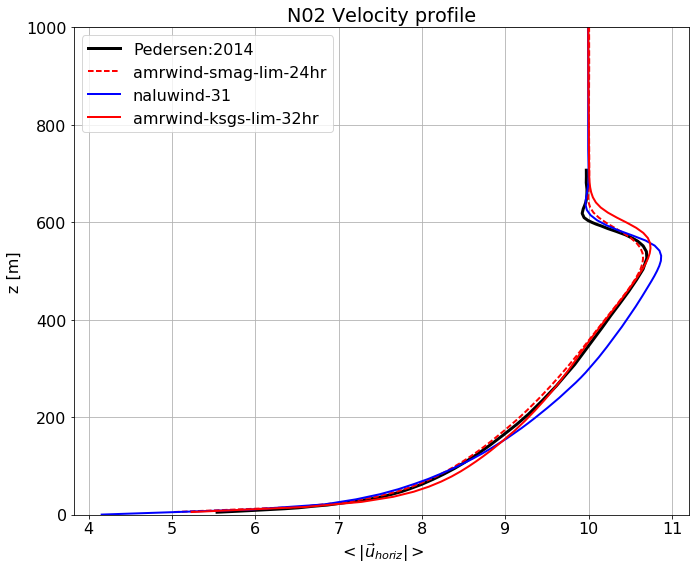

In [12]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in b_cases.items():
    ls=b_styles[l]
    plt.plot(c.hvelmag, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])

plt.xlabel(r'$< | \vec{u}_{horiz} | >$')
plt.ylabel('z [m]')
plt.legend(loc=0)
plt.ylim(0,1000)
#plt.ylim(0,100)
plt.grid()
plt.tight_layout()
plt.title('N02 Velocity profile')

## Plot temperature profile

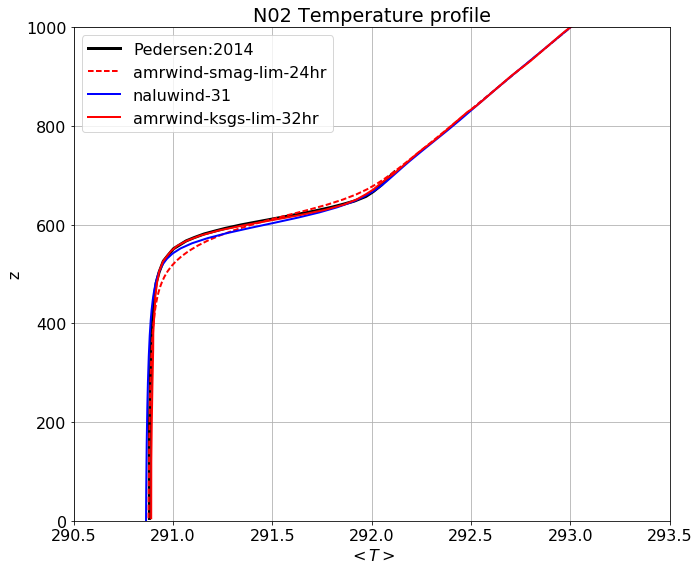

In [13]:
fig = plt.figure(figsize=(10,8))
plt.rc('font', size=16)

for l,c in b_cases.items():
    ls=b_styles[l]
    plt.plot(c.T, c.z, label=l, color=ls['color'], linewidth=ls['lw'], linestyle=ls['ls'])
plt.xlabel(r'$<T>$')
plt.ylabel('z')
plt.legend(loc=0)
plt.ylim(0,1000)
plt.xlim(290.5, 293.5)
plt.grid()
plt.tight_layout()
plt.title('N02 Temperature profile')